In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [343]:
df = pd.read_csv('../data/tweets_final.csv')

## Data Understanding

In [344]:
df.shape

(54, 11)

In [345]:
df.head()

,profile_id,name,username,topic,text,date,time,likes,comments,reposts,theme
0,566526924059459584,The Mindfulness Meditation Institute,@TrainingMindful,health,“How to Better Cope with Grief through Mindful...,2024-01-12,23:55,9,0,1,Mindful Meditation Grieving
1,1565046183545843712,Nancy Gerber,@NancyGCND,health,Quaker products recalled in Canada over salmon...,2024-01-12,23:54,0,0,0,NaN
2,895529569968472065,Global Eat,@GlobalEAT,health,Not a pleasant trip for those impacted by the ...,2024-01-12,23:47,0,0,0,NaN
3,1687918233838301185,CanMyDogEat.org,@CanMyDogEat,health,Some safe alternatives to garlic bread for dog...,2024-01-12,23:44,1,0,0,Dog Garlic Bread Alternatives
4,1178662976112484352,Beyond Pesticides,@ByondPesticides,health,"As we commemorate Dr. #MartinLutherKing Jr., a...",2024-01-12,23:45,7,0,3,Dr. Martin Luther King Jr. Health


In [346]:
df.describe()

,profile_id,likes,comments,reposts
count,5.400000e+01,54.000000,54.000000,54.000000
mean,1.350017e+18,2.574074,0.222222,0.222222
std,4.007448e+17,8.130079,0.571878,0.603970
min,5.536443e+07,0.000000,0.000000,0.000000
25%,1.083074e+18,0.000000,0.000000,0.000000
50%,1.494820e+18,0.000000,0.000000,0.000000
75%,1.686387e+18,1.000000,0.000000,0.000000
max,1.747011e+18,53.000000,3.000000,3.000000


In [347]:
df.describe(include='object')

,name,username,topic,text,date,time,theme
count,54,54,54,54,54,54,40
unique,48,48,3,53,1,29,38
top,Syeda Sheraj Ali,@Sheraj99,space,"Scientists have found a strange ring in space,...",2024-01-12,23:32,Peregrine Mission
freq,3,3,21,2,54,5,2


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profile_id  54 non-null     int64 
 1   name        54 non-null     object
 2   username    54 non-null     object
 3   topic       54 non-null     object
 4   text        54 non-null     object
 5   date        54 non-null     object
 6   time        54 non-null     object
 7   likes       54 non-null     int64 
 8   comments    54 non-null     int64 
 9   reposts     54 non-null     int64 
 10  theme       40 non-null     object
dtypes: int64(4), object(7)
memory usage: 4.8+ KB


## Feature Understanding

#### Univaraiate Analysis

1. Number of tweets in each topic

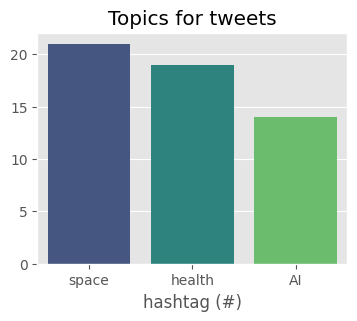

In [ ]:
# rows for each topic
topics = df['topic'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=topics.index, y=topics.values, hue=topics.index, palette='viridis')
plt.title("Topics for tweets")
plt.xlabel("hashtag (#)")
plt.show()

2. Users (usernames) with most tweets

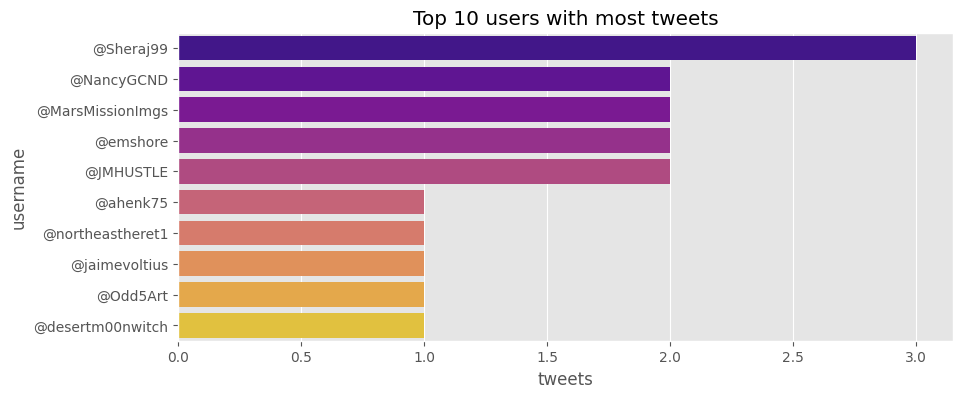

In [ ]:
users = df['username'].value_counts()

top_ten_users = users[:10]
# top ten users with most tweets
plt.figure(figsize=(10, 4))
sns.barplot(x=top_ten_users.values, y=top_ten_users.index, hue=top_ten_users.index, palette='plasma')
plt.title("Top 10 users with most tweets")
plt.xlabel("tweets")
plt.show()

3. Data and Time

In [349]:
df['date'].value_counts()

date
2024-01-12    54
Name: count, dtype: int64

In [350]:
from matplotlib.dates import DateFormatter

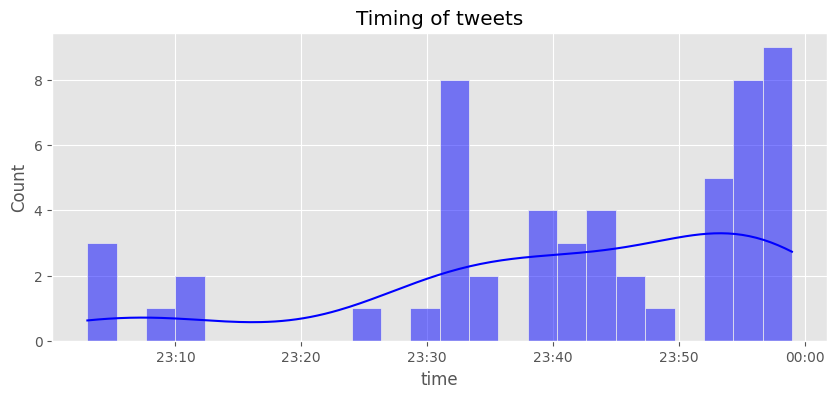

In [351]:
# time of tweets

df['time'] = pd.to_datetime(df['time'], format='%H:%M')

plt.figure(figsize=(10, 4))
ax = sns.histplot(data=df, x='time', color='blue', bins=24, kde=True)
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title("Timing of tweets")
plt.show()

4. Likes, Comments, and Reposts

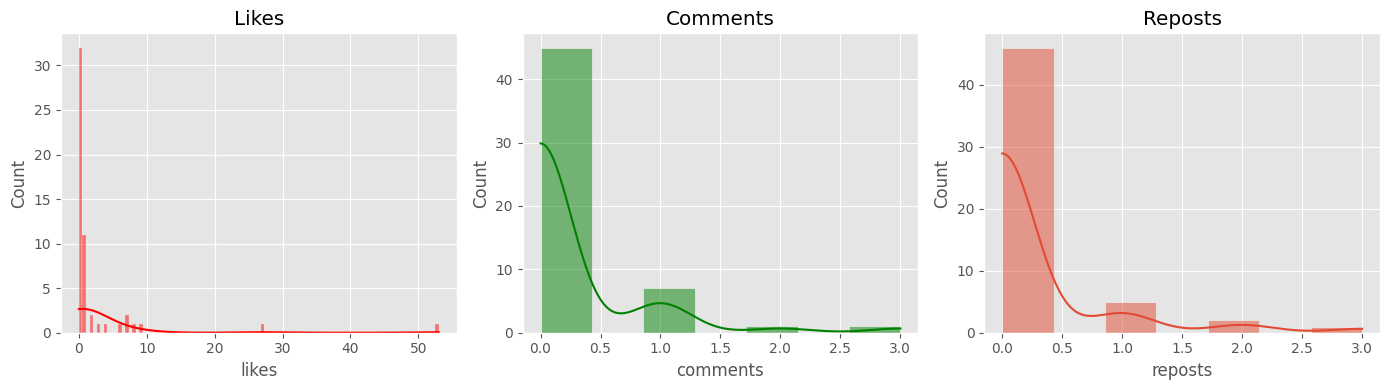

In [352]:
# Create three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='likes', kde=True, ax=axes[0], color='red')
axes[0].set_title('Likes')

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='comments', kde=True, ax=axes[1], color='green')
axes[1].set_title('Comments')

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='reposts', kde=True, ax=axes[2])
axes[2].set_title('Reposts')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

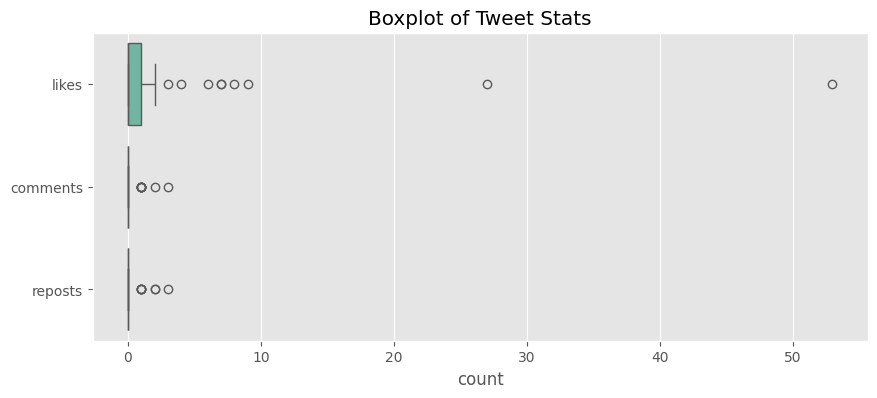

In [353]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['likes', 'comments', 'reposts']], palette='Set2', orient='h')

plt.xlabel('count')
plt.title('Boxplot of Tweet Stats')
plt.show()

## Feature Relationships

#### Bivariate Analysis

1. Topic vs Likes 

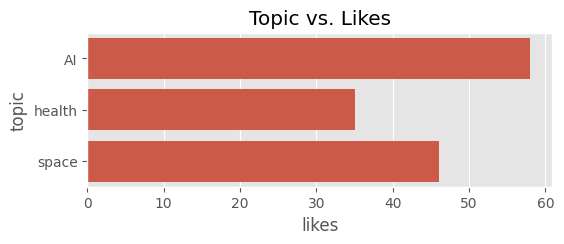

In [354]:
topic_likes = df.groupby('topic')['likes'].sum().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(y=topic_likes['topic'], x=topic_likes['likes'])
plt.title("Topic vs. Likes")
plt.show()

2. Date/Time vs Likes

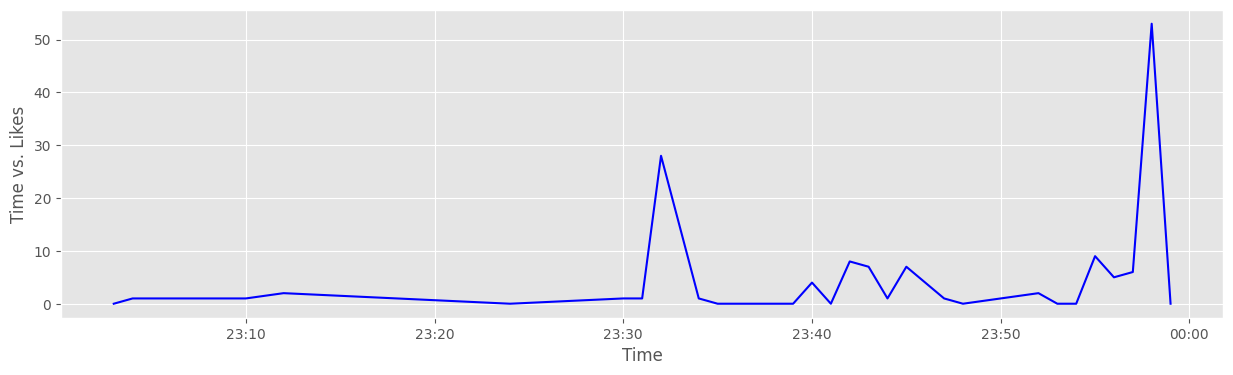

In [355]:
time_likes = df.groupby(df['time'].dt.time)['likes'].transform('sum')
plt.figure(figsize=(15, 4))
ax = sns.lineplot(data=df, x='time', y=time_likes, color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Time vs. Likes')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.show()


3. Users with most Likes

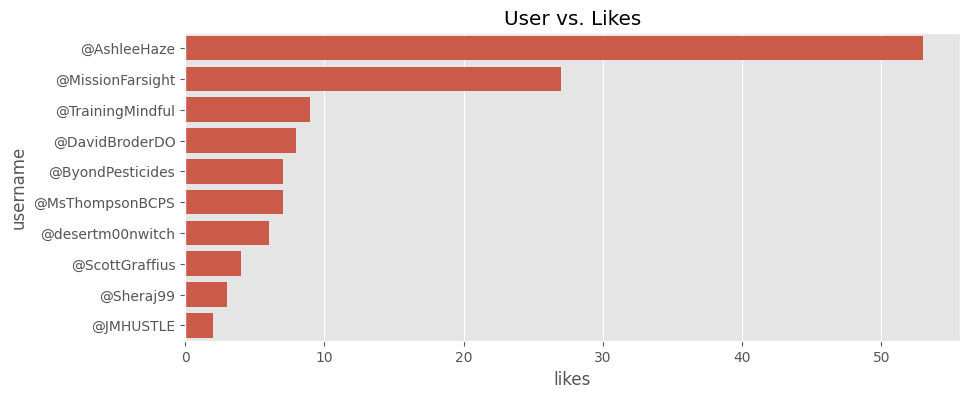

In [358]:
# top 10 users with most likes
top_users_likes = df.groupby('username')['likes'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(y=top_users_likes['username'], x=top_users_likes['likes'])
plt.title("User vs. Likes")
plt.show()

4. Tweets with the most Likes

In [359]:
# top 5 most liked tweets
most_liked_tweets = df.sort_values(by='likes', ascending=False)
most_liked_tweets.iloc[:5,:]

,profile_id,name,username,topic,text,date,time,likes,comments,reposts,theme
21,1747010709303554048,blark bent,@AshleeHaze,AI,Doing all that with no hands is crazy #ai,2024-01-12,1900-01-01 23:58:00,53,3,1,AI and Self-Driving Cars
43,1049675260499349507,🚀Commander Picard🚀,@MissionFarsight,space,"Captains Log MFS Day 2,564 - Just outside the ...",2024-01-12,1900-01-01 23:32:00,27,1,2,NaN
0,566526924059459584,The Mindfulness Meditation Institute,@TrainingMindful,health,“How to Better Cope with Grief through Mindful...,2024-01-12,1900-01-01 23:55:00,9,0,1,Mindful Meditation Grieving
7,1037034619764449286,"David Broder, DO",@DavidBroderDO,health,Colorado doctor prescribes ping pong treatment...,2024-01-12,1900-01-01 23:42:00,8,1,2,Ping Pong Treatment Colorado
4,1178662976112484352,Beyond Pesticides,@ByondPesticides,health,"As we commemorate Dr. #MartinLutherKing Jr., a...",2024-01-12,1900-01-01 23:45:00,7,0,3,Dr. Martin Luther King Jr. Health
